# `Using TensorFlow like NumPy`
* TensorFlow can be used in a way similar to NumPy for numerical computations, array manipulations, and mathematical operations. 
* TensorFlow like NumPy allows you to benefit from TensorFlow's powerful features such as `automatic differentiation`, `GPU acceleration`, `distributed computing`, and seamless integration with `deep learning frameworks`. This approach is ideal for scientific computing and building complex machine learning models.

## Tensors and operations

* In TensorFlow, `tensors` are fundamental objects that represent data in the computation graph. They flow through operations, allowing for efficient computation and differentiation.

* Tensors are central to TensorFlow's design, enabling efficient and scalable computation in deep learning models. By understanding how to create and manipulate tensors, you can effectively work with TensorFlow's API to build and train sophisticated machine learning models.

* These tensors will be important when we create `custom cost functions`, `custom metrics`, `custom layers`, and more, so let’s see how to create and manipulate them.

### 1. Creating Tensors
* You can create tensors in TensorFlow just like NumPy arrays:

In [33]:
import tensorflow as tf

# Create a constant tensor (Immutable:)
a = tf.constant([[1.0, 2.0], [3.0, 4.0]])

# Create a variable tensor (can be updated)
b = tf.Variable([[1.0, 2.0], [3.0, 4.0]])

# Accessing shape, dtype, and ndim
tensor = tf.constant([[1, 2], [3, 4]])
# shape: Attribute that returns the shape of the tensor.
print(tensor.shape)  # Output: (2, 2)
# dtype: Attribute that returns the data type of the tensor.
print(tensor.dtype)  # Output: <dtype: 'int32'>
# ndim: Method that returns the number of dimensions (or rank) of the tensor.
print(tensor.ndim)  # Output: 2

# Create tensors with specified shape and dtype
zeros_tensor = tf.zeros((3, 3), dtype=tf.float32)
ones_tensor = tf.ones((2, 2), dtype=tf.int32)
random_tensor = tf.random.normal((3, 3), mean=0.0, stddev=1.0, dtype=tf.float32)

(2, 2)
<dtype: 'int32'>
2


### 2. Indexing
* Indexing refers to accessing individual elements within a tensor using specific indices :

In [34]:
import tensorflow as tf

# Define a 2D tensor
tensor_2d = tf.constant([[1, 2, 3],
                          [4, 5, 6]])

# Accessing individual elements
print(tensor_2d[0, 0])  # Output: 1
print(tensor_2d[1, 2])  # Output: 6

tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)


### 3. Slicing
* Slicing allows you to extract sub-tensors (slices) from a larger tensor based on specific ranges of indices along each dimension.

In [35]:
import tensorflow as tf

# Slicing along rows and columns
print(tensor_2d[0, :])  # Slice the first row: [1, 2, 3]
print(tensor_2d[:, 1])  # Slice the second column: [2, 5, 8]

# Slicing sub-tensors
print(tensor_2d[1:, :2])  # Slice rows from index 1 onwards and columns up to index 2:
                          # [[4, 5],
                          #  [7, 8]]

tf.Tensor([1 2 3], shape=(3,), dtype=int32)
tf.Tensor([2 5], shape=(2,), dtype=int32)
tf.Tensor([[4 5]], shape=(1, 2), dtype=int32)


In [36]:
import tensorflow as tf

# Define a 3D tensor (3x3x3)
tensor_3d = tf.Variable([
    [[1, 2, 3],
     [4, 5, 6],
     [7, 8, 9]],

    [[10, 11, 12],
     [13, 14, 15],
     [16, 17, 18]],

    [[19, 20, 21],
     [22, 23, 24],
     [25, 26, 27]]
])

# Slicing along different dimensions
print(tensor_3d[1, :, :])  # Slice the entire 2nd 'layer' (2nd matrix)
print(tensor_3d[:, 1, 1])  # Slice the (1, 1) element from each 'layer'
print(tensor_3d[0:2, :, 0])  # Slice the first two 'layers' and extract the first column

tf.Tensor(
[[10 11 12]
 [13 14 15]
 [16 17 18]], shape=(3, 3), dtype=int32)
tf.Tensor([ 5 14 23], shape=(3,), dtype=int32)
tf.Tensor(
[[ 1  4  7]
 [10 13 16]], shape=(2, 3), dtype=int32)


### 4. Modification of elements
* The tensorflow does not support item assignment occurs when you attempt to directly modify an individual element of a TensorFlow tensor.

### 4.1 Mutability and In-Place Modification
* One of the main features of tf.Variable is its mutability. 
* You can modify the value of a variable using the `assign()`, `assign_add()`, or `assign_sub()` methods.

In [37]:
import tensorflow as tf

# Create a TensorFlow variable initialized with a scalar value
var = tf.Variable(5.0)

# Example: Using assign() to set a new value
new_value = 10.0
var.assign(new_value)

print("After assign(new_value):", var.numpy())  # Output: 10.0

# Example: Using assign_add() to increment the variable
increment_by = 2.0
var.assign_add(increment_by)

print("After assign_add(increment_by):", var.numpy())  # Output: 12.0

# Example: Using assign_sub() to decrement the variable
decrement_by = 3.0
var.assign_sub(decrement_by)

print("After assign_sub(decrement_by):", var.numpy())  # Output: 9.0

After assign(new_value): 10.0
After assign_add(increment_by): 12.0
After assign_sub(decrement_by): 9.0


### 4.2 Modifying Individual Elements
* You can modify individual elements (or slices) of a tf.Variable using the `assign()` method on specific indices or slices.
* Direct item assignment `(var[0] = value)` does `not work` on tf.Variable objects.

In [38]:
import tensorflow as tf

# Create a tf.Variable
var = tf.Variable([1, 2, 3, 4])

# Modify individual elements using assign() method
var[1].assign(5)  # Modify the second element to 5
print(var.numpy())  # Output: [1, 5, 3, 4]

# Modify range of elements using assign() method
var[1:3].assign(3)  # Modify the second element to 5
print(var.numpy())  # Output: [1, 5, 3, 4]


[1 5 3 4]
[1 3 3 4]


### 4.3 Advanced Modification with `scatter_nd_update()`
* TensorFlow provides advanced method like `scatter_nd_update()` to modify specific elements or slices of a variable based on indices.
* These methods are useful for updating variable values in a more complex and efficient manner.

In [39]:
import tensorflow as tf

# Create a TensorFlow variable initialized with zeros
var = tf.Variable([0.0, 0.0, 0.0, 0.0])

# Define sparse indices and updates
indices_sparse = tf.constant([[1], [3]])  # Define sparse indices as a 2D tensor
updates_sparse = tf.constant([5.0, 7.0])  # Define corresponding sparse updates

# Perform sparse scatter_nd_update
updated_var = tf.tensor_scatter_nd_update(var, indices_sparse, updates_sparse)

print("After scatter_nd_update(indices_sparse, updates_sparse):", updated_var.numpy())
# Output: [0.0, 5.0, 0.0, 7.0]

After scatter_nd_update(indices_sparse, updates_sparse): [0. 5. 0. 7.]


In [40]:
import tensorflow as tf

# Create a TensorFlow variable initialized with zeros (2D tensor)
var = tf.Variable([[0.0, 0.0, 0.0],
                   [0.0, 0.0, 0.0],
                   [0.0, 0.0, 0.0]])

# Define sparse indices and updates for a 2D tensor
indices_sparse = tf.constant([[0, 1],   # Update element at row 0, column 1
                              [1, 2]])  # Update element at row 1, column 2

updates_sparse = tf.constant([5.0, 7.0])  # Corresponding sparse update values

# Perform sparse scatter_nd_update on the 2D tensor
updated_var = tf.tensor_scatter_nd_update(var, indices_sparse, updates_sparse)

print("After scatter_nd_update(indices_sparse, updates_sparse):")
print(updated_var.numpy())


After scatter_nd_update(indices_sparse, updates_sparse):
[[0. 5. 0.]
 [0. 0. 7.]
 [0. 0. 0.]]


In [41]:
import tensorflow as tf

# Create a TensorFlow variable initialized with zeros (2D tensor: 3x4 matrix)
var = tf.Variable([[0.0, 0.0, 0.0, 0.0],
                   [0.0, 0.0, 0.0, 0.0],
                   [0.0, 0.0, 0.0, 0.0]])

# Define the range of row and column indices to update (slicing)
start_row = 1
end_row = 3
start_col = 1
end_col = 4

# Generate new values for the specified range (2D tensor: corresponding submatrix)
new_values = tf.constant([[5.0, 7.0, 3.0],
                          [1.0, 2.0, 4.0]])

# Calculate the dimensions of the new values tensor
num_rows, num_cols = new_values.shape

# Generate indices for the range to update using meshgrid and stack
rows, cols = tf.meshgrid(tf.range(start_row, end_row), tf.range(start_col, end_col), indexing='ij')
indices_sparse = tf.stack([rows, cols], axis=-1)

# Perform sparse scatter_nd_update to modify the specified submatrix range
updated_var = tf.tensor_scatter_nd_update(var, indices_sparse, new_values)

print("After modifying the range of elements:")
print(updated_var.numpy())

After modifying the range of elements:
[[0. 0. 0. 0.]
 [0. 5. 7. 3.]
 [0. 1. 2. 4.]]


### 5. Array Manipulation

In [42]:
# .reshape():
# .reshape() is used to change the shape of a tensor while keeping the same underlying data.

import tensorflow as tf

# Create a tensor
x = tf.constant([[1, 2],
                 [3, 4]])

# Reshape the tensor to a new shape
x_reshaped = tf.reshape(x, [1, 4])  # Reshape to shape (1, 4)
print(x_reshaped)

tf.Tensor([[1 2 3 4]], shape=(1, 4), dtype=int32)


In [43]:
# tf.squeeze():
# This function removes dimensions of size 1 from the shape of a tensor.

import tensorflow as tf

# Create a tensor with shape (1, 3, 1)
x = tf.constant([[[1], [2], [3]]])

# Squeeze the tensor to remove dimensions of size 1
x_squeezed = tf.squeeze(x)
print(x_squeezed)  # Output shape will be (3,)

tf.Tensor([1 2 3], shape=(3,), dtype=int32)


In [44]:
# tile():
# tf.tile() is used to construct a new tensor by tiling the input tensor.
# It replicates the input tensor's data along specified dimensions.

import tensorflow as tf

# Create a tensor
x = tf.constant([[1, 2],
                 [3, 4]])

# Tile the tensor along rows and columns
x_tiled = tf.tile(x, [2, 3])  # Tile to (2, 3) replication
print(x_tiled)

tf.Tensor(
[[1 2 1 2 1 2]
 [3 4 3 4 3 4]
 [1 2 1 2 1 2]
 [3 4 3 4 3 4]], shape=(4, 6), dtype=int32)


### 6. Arithmetic Operations

In [45]:
import tensorflow as tf

# Define a 2D tensor (3x3)
tensor_a = tf.random.normal((3, 3), mean=0.0, stddev=1.0, dtype=tf.float32)
tensor_b = tf.random.normal((3, 3), mean=0.0, stddev=1.0, dtype=tf.float32)

# Addition: Element-wise addition of two tensors.
result = tf.add(tensor_a, tensor_b)
result = tensor_a.__add__(tensor_b)
result = tensor_a + tensor_b
# Subtraction: Element-wise subtraction of two tensors.
result = tf.subtract(tensor_a, tensor_b)
# Multiplication: Element-wise multiplication of two tensors.
result = tf.multiply(tensor_a, tensor_b)
# Division: Element-wise division of two tensors.
result = tf.divide(tensor_a, tensor_b)
# Exponentiation: Element-wise exponentiation of a tensor.
exponent = 2
result = tf.pow(tensor_a, exponent)

### 7. Broadcasting Basics
* Broadcasting is a technique used in TensorFlow to perform element-wise operations on tensors of different shapes by implicitly aligning their dimensions. The main concept is to extend (or "broadcast") smaller tensors to match the shape of larger tensors before applying element-wise operations.

In [46]:
# Example 1: Broadcasting Scalars
import tensorflow as tf

# Define a tensor with shape (2, 3)
tensor_a = tf.constant([[1, 2, 3],
                         [4, 5, 6]])

# Define a scalar value
scalar_b = tf.constant(2)

# Element-wise multiplication using broadcasting
result = tensor_a * scalar_b

# Display the result
print(result.numpy())

[[ 2  4  6]
 [ 8 10 12]]


In [47]:
# Example 2: Broadcasting Vectors
import tensorflow as tf

# Define a matrix with shape (2, 3)
matrix_a = tf.constant([[1, 2, 3],
                        [4, 5, 6]])

# Define a vector with shape (3,)
vector_b = tf.constant([10, 20, 30])

# Element-wise addition using broadcasting
result = matrix_a + vector_b

# Display the result
print(result.numpy())

[[11 22 33]
 [14 25 36]]


In [48]:
# Example 3: Broadcasting Along Different Axes
import tensorflow as tf

# Define a matrix with shape (2, 3)
matrix_a = tf.constant([[1, 2, 3],
                        [4, 5, 6]])

# Define a vector with shape (2,)
vector_c = tf.constant([10, 20])

# Element-wise multiplication using broadcasting along different axes
result = matrix_a * vector_c[:, tf.newaxis]

# Display the result
print(result.numpy())

[[ 10  20  30]
 [ 80 100 120]]


### 8. Reduction operations
* Reduction operations in TensorFlow are used to compute aggregate values (e.g., sum, mean, maximum, minimum) over specific dimensions of a tensor, resulting in a tensor with reduced dimensions or a scalar value. 

In [49]:
# 1. tf.reduce_sum

import tensorflow as tf

# Define a tensor
tensor = tf.constant([[1, 2, 3],
                       [4, 5, 6]])

# Compute sum along axis 0 (sum of each column)
sum_along_axis0 = tf.reduce_sum(tensor, axis=0)

# Compute sum along axis 1 (sum of each row)
sum_along_axis1 = tf.reduce_sum(tensor, axis=1)

print("Sum along axis 0:", sum_along_axis0.numpy())  # Output: [5 7 9]
print("Sum along axis 1:", sum_along_axis1.numpy())  # Output: [ 6 15]

Sum along axis 0: [5 7 9]
Sum along axis 1: [ 6 15]


In [50]:
# 2. tf.reduce_mean
import tensorflow as tf

# Define a tensor
tensor = tf.constant([[1, 2, 3],
                       [4, 5, 6]])

# Compute mean along axis 0 (mean of each column)
mean_along_axis0 = tf.reduce_mean(tensor, axis=0)

# Compute mean along axis 1 (mean of each row)
mean_along_axis1 = tf.reduce_mean(tensor, axis=1)

print("Mean along axis 0:", mean_along_axis0.numpy())  # Output: [2.5 3.5 4.5]
print("Mean along axis 1:", mean_along_axis1.numpy())  # Output: [2. 5.]

Mean along axis 0: [2 3 4]
Mean along axis 1: [2 5]


In [51]:
# 3. tf.reduce_max and tf.reduce_min
import tensorflow as tf

# Define a tensor
tensor = tf.constant([[1, 2, 3],
                       [4, 5, 6]])

# Compute maximum along axis 0 (maximum of each column)
max_along_axis0 = tf.reduce_max(tensor, axis=0)

# Compute minimum along axis 1 (minimum of each row)
min_along_axis1 = tf.reduce_min(tensor, axis=1)

print("Maximum along axis 0:", max_along_axis0.numpy())  # Output: [4 5 6]
print("Minimum along axis 1:", min_along_axis1.numpy())  # Output: [1 4]

Maximum along axis 0: [4 5 6]
Minimum along axis 1: [1 4]


In [52]:
# 4. tf.math.reduce_std
import tensorflow as tf

# Define a tensor
tensor = tf.constant([[1.0, 2.0, 3.0],
                       [4.0, 5.0, 6.0]])

# Compute the standard deviation across all elements
std_all = tf.math.reduce_std(tensor)

# Compute the standard deviation along axis 0 (column-wise)
std_axis0 = tf.math.reduce_std(tensor, axis=0)

# Compute the standard deviation along axis 1 (row-wise)
std_axis1 = tf.math.reduce_std(tensor, axis=1)

print("Standard Deviation (all elements):", std_all.numpy())
print("Standard Deviation along axis 0 (column-wise):", std_axis0.numpy())
print("Standard Deviation along axis 1 (row-wise):", std_axis1.numpy())

Standard Deviation (all elements): 1.7078252
Standard Deviation along axis 0 (column-wise): [1.5 1.5 1.5]
Standard Deviation along axis 1 (row-wise): [0.8164966 0.8164966]


### 9. Basic Mathematical Functions

In [53]:
import tensorflow as tf

# Define a 2D tensor (3x3)
tensor = tf.random.normal((3, 3), mean=0.0, stddev=1.0, dtype=tf.float32)

# Square Root: Element-wise square root of a tensor.
result = tf.sqrt(tensor)
# Absolute Value: Element-wise absolute value of a tensor.
result = tf.abs(tensor)
# Negative: Element-wise negation of a tensor.
result = tf.negative(tensor)
# Sine, Cosine, Tangent: Element-wise trigonometric functions.
result_sin = tf.sin(tensor)
result_cos = tf.cos(tensor)
result_tan = tf.tan(tensor)

### 10. Matrix Operations

In [54]:
# Multiplication of the tensors
import tensorflow as tf

# Matrix multiplication
mat1 = tf.constant([[1, 2], [3, 4]])
mat2 = tf.constant([[5, 6], [7, 8]])
mat_mult = tf.matmul(mat1, mat2)


# Perform matrix multiplication using the @ operator
mat_mult = mat1 @ mat2  # This is equivalent to tf.matmul(mat1, mat2)

In [55]:
# Transpose of a tensor
import tensorflow as tf

# Create a tensor with shape (2, 3)
x = tf.constant([[1, 2, 3],
                 [4, 5, 6]])

# Transpose the tensor
x_transposed = tf.transpose(x)  # By default, this swaps the first and second dimensions

print("Original tensor:")
print(x)
print("Transposed tensor:")
print(x_transposed)


Original tensor:
tf.Tensor(
[[1 2 3]
 [4 5 6]], shape=(2, 3), dtype=int32)
Transposed tensor:
tf.Tensor(
[[1 4]
 [2 5]
 [3 6]], shape=(3, 2), dtype=int32)


In [56]:
# Inverse of a tensor
import tensorflow as tf

# Create a square matrix (2x2) as a TensorFlow constant
A = tf.constant([[1.0, 2.0],
                 [3.0, 4.0]])

# Compute the inverse of the matrix A
A_inverse = tf.linalg.inv(A)

# Print the original matrix and its inverse
print("Original matrix A:")
print(A)

print("Inverse of matrix A:")
print(A_inverse)

Original matrix A:
tf.Tensor(
[[1. 2.]
 [3. 4.]], shape=(2, 2), dtype=float32)
Inverse of matrix A:
tf.Tensor(
[[-2.0000002   1.0000001 ]
 [ 1.5000001  -0.50000006]], shape=(2, 2), dtype=float32)


### 11. Comparison Operations

In [57]:
import tensorflow as tf

# Define a 2D tensor (3x3)
tensor_a = tf.random.normal((3, 3), mean=0.0, stddev=1.0, dtype=tf.float32)
tensor_b = tf.random.normal((3, 3), mean=0.0, stddev=1.0, dtype=tf.float32)

# Create condition_a and condition_b boolean tensors
condition_a = tf.constant([True, False, True])   # Example boolean tensor 1
condition_b = tf.constant([False, True, True])   # Example boolean tensor 2

# Equal: Element-wise equality comparison of two tensors.
result = tf.equal(tensor_a, tensor_b)
# Not Equal: Element-wise inequality comparison of two tensors.
result = tf.not_equal(tensor_a, tensor_b)
# Greater Than, Less Than: Element-wise comparison of two tensors.
result_gt = tf.greater(tensor_a, tensor_b)
result_lt = tf.less(tensor_a, tensor_b)
# Logical AND, OR: Element-wise logical operations.
result_and = tf.logical_and(condition_a, condition_b)
result_or = tf.logical_or(condition_a, condition_b)

### 12. Clipping and Normalization

In [58]:
import tensorflow as tf

# Define a tensor with values
tensor = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0])

# Clip the tensor values to be between 2.0 and 4.0
clipped_tensor = tf.clip_by_value(tensor, clip_value_min=2.0, clip_value_max=4.0)

# Perform L2 normalization along axis 1 (normalize each row)
normalized_x = tf.nn.l2_normalize(tensor, axis=0)

### 13. Handling Missing Values

In [59]:
import tensorflow as tf

# Define a tensor with values
tensor = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0])

# Is NaN, Is Finite: Element-wise checks for NaN (Not a Number) and finite values.
result_isnan = tf.math.is_nan(tensor)
result_isfinite = tf.math.is_finite(tensor)

### 14. Applying TensorFlow Operations to NumPy Arrays
* You can convert NumPy arrays to TensorFlow tensors using tf.convert_to_tensor() and then apply TensorFlow operations to these tensors.

In [60]:
import tensorflow as tf
import numpy as np

# Create a NumPy array
numpy_array = np.array([[1.0, 2.0],
                         [3.0, 4.0]])

# Convert NumPy array to a TensorFlow tensor
tensor = tf.convert_to_tensor(numpy_array)

# Apply TensorFlow operations to the tensor
result = tf.square(tensor)  # Square each element

# Convert the result back to a NumPy array (if needed)
result_numpy = result.numpy()

print("Result (TensorFlow tensor):")
print(result)

print("Result (NumPy array):")
print(result_numpy)

Result (TensorFlow tensor):
tf.Tensor(
[[ 1.  4.]
 [ 9. 16.]], shape=(2, 2), dtype=float64)
Result (NumPy array):
[[ 1.  4.]
 [ 9. 16.]]


* You can apply TensorFlow operations on a NumPy array without converting it to a TensorFlow tensor:

In [61]:
import tensorflow as tf
import numpy as np

# Create a NumPy array
numpy_array = np.array([[1.0, 2.0],
                         [3.0, 4.0]])

# Apply TensorFlow operations directly on the NumPy array
result_numpy = tf.square(numpy_array)  # Square each element using NumPy operation

print("Result (NumPy array after TensorFlow operation):")
print(result_numpy)


Result (NumPy array after TensorFlow operation):
tf.Tensor(
[[ 1.  4.]
 [ 9. 16.]], shape=(2, 2), dtype=float64)


### 15. Applying NumPy Operations to TensorFlow Tensors
* Similarly, you can convert TensorFlow tensors to NumPy arrays using .numpy() and apply NumPy operations to these arrays.

In [62]:
import tensorflow as tf
import numpy as np

# Create a TensorFlow tensor
tensor = tf.constant([[1.0, 2.0],
                      [3.0, 4.0]])

# Convert TensorFlow tensor to a NumPy array
numpy_array = tensor.numpy()

# Apply NumPy operations to the NumPy array
result_numpy = np.sqrt(numpy_array)  # Compute element-wise square root

print("Result (NumPy array):")
print(result_numpy)

Result (NumPy array):
[[1.        1.4142135]
 [1.7320508 2.       ]]


* To apply NumPy operations directly on TensorFlow tensors without converting them explicitly, you can utilize TensorFlow's ability to seamlessly interoperate with NumPy arrays within eager execution mode. 

In [63]:
import tensorflow as tf
import numpy as np

# Create a TensorFlow tensor
tensor = tf.constant([[1.0, 2.0],
                      [3.0, 4.0]])

# Apply NumPy operations directly on the TensorFlow tensor
result_numpy = np.square(tensor.numpy())  # Square each element using NumPy operation on tensor's numpy array

print("Result (NumPy array after applying NumPy operation on TensorFlow tensor):")
print(result_numpy)

Result (NumPy array after applying NumPy operation on TensorFlow tensor):
[[ 1.  4.]
 [ 9. 16.]]


### 16. Operations Between Tensors of Different Types

* When you attempt to perform operations (like addition, multiplication, etc.) between tensors of different data types, TensorFlow will `raise an exception` indicating the type incompatibility.
* If you need to perform operations between tensors of different types, you can `explicitly convert tensors` to compatible types using `tf.cast()`:
* It's important to maintain data type consistency in your TensorFlow computations to ensure efficient execution and avoid unnecessary type conversions. When building TensorFlow models, specifying data types explicitly can help in optimizing performance and avoiding unexpected behaviors due to type mismatches.

In [1]:
import tensorflow as tf

# Create tensors of different types
tensor_int = tf.constant(5)  # Integer tensor
tensor_float = tf.constant(3.0)  # Float tensor

# Attempt to add tensors of different types
result = tensor_int + tensor_float  # This will raise a TypeError

InvalidArgumentError: cannot compute AddV2 as input #1(zero-based) was expected to be a int32 tensor but is a float tensor [Op:AddV2]

In [ ]:
# Explicit Type Conversion

import tensorflow as tf

# Create tensors of different types
tensor_int = tf.constant(5)  # Integer tensor
tensor_float = tf.constant(3.0)  # Float tensor

# Convert integer tensor to float
tensor_int_float = tf.cast(tensor_int, tf.float32)

# Perform addition after type conversion
result = tensor_int_float + tensor_float  # This will work

### 17. SparseTensor in TensorFlow

* Sparse tensors in TensorFlow are a special type of tensor that efficiently represents and manipulates tensors containing mostly zero values. 
* This is particularly useful for handling sparse data structures where most elements are zero, such as sparse matrices or high-dimensional data with sparse representations.

In [ ]:
# 1. Creating a SparseTensor

import tensorflow as tf

# Define the non-zero elements and their indices
indices = tf.constant([[0, 1], [1, 2], [2, 0]])  # Example indices with dtype int32
values = tf.constant([3.0, 4.0, 5.0])             # Corresponding non-zero values
dense_shape = tf.constant([3, 3], dtype=tf.int64)  # Shape of the dense tensor (3x3) with dtype int64

# Convert indices to dtype int64 (if needed, though it's already int64 in this case)
indices = tf.cast(indices, dtype=tf.int64)

# Create the SparseTensor
sparse_tensor = tf.sparse.SparseTensor(indices=indices, values=values, dense_shape=dense_shape)

print("SparseTensor:")
print(sparse_tensor)

SparseTensor:
SparseTensor(indices=tf.Tensor(
[[0 1]
 [1 2]
 [2 0]], shape=(3, 2), dtype=int64), values=tf.Tensor([3. 4. 5.], shape=(3,), dtype=float32), dense_shape=tf.Tensor([3 3], shape=(2,), dtype=int64))


In [ ]:
# 2. Converting SparseTensor to Dense Tensor

dense_tensor = tf.sparse.to_dense(sparse_tensor)
print("Dense Tensor:")
print(dense_tensor)

Dense Tensor:
tf.Tensor(
[[0. 3. 0.]
 [0. 0. 4.]
 [5. 0. 0.]], shape=(3, 3), dtype=float32)


In [ ]:
# 3. Accessing Elements of SparseTensor

# Define the example sparse tensor
indices = tf.constant([[0, 1], [1, 2], [2, 0]], dtype=tf.int64)
values = tf.constant([3.0, 4.0, 5.0])
dense_shape = tf.constant([3, 3], dtype=tf.int64)
sparse_tensor = tf.sparse.SparseTensor(indices=indices, values=values, dense_shape=dense_shape)

# Accessing a specific element at row=1, column=2
row_index = 1
col_index = 2

# Convert sparse tensor to dense tensor and access the element
dense_tensor = tf.sparse.to_dense(sparse_tensor)
element_value = dense_tensor[row_index, col_index]

print("Value at index ({}, {}):".format(row_index, col_index), element_value.numpy())



Value at index (1, 2): 4.0


In [ ]:
# 4. Performing Element-wise Operations

import tensorflow as tf

# Define the example sparse tensor
indices = tf.constant([[0, 1], [1, 2], [2, 0]], dtype=tf.int64)
values = tf.constant([3.0, 4.0, 5.0])
dense_shape = tf.constant([3, 3], dtype=tf.int64)
sparse_tensor = tf.sparse.SparseTensor(indices=indices, values=values, dense_shape=dense_shape)

# Define the scalar value for multiplication
scalar = 2.0

# Perform element-wise multiplication of SparseTensor values by the scalar
scaled_values = sparse_tensor.values * scalar

# Create a new SparseTensor with the scaled values
scaled_sparse_tensor = tf.sparse.SparseTensor(indices=sparse_tensor.indices,
                                              values=scaled_values,
                                              dense_shape=sparse_tensor.dense_shape)

print("Scaled SparseTensor:")
print(scaled_sparse_tensor)



Scaled SparseTensor:
SparseTensor(indices=tf.Tensor(
[[0 1]
 [1 2]
 [2 0]], shape=(3, 2), dtype=int64), values=tf.Tensor([ 6.  8. 10.], shape=(3,), dtype=float32), dense_shape=tf.Tensor([3 3], shape=(2,), dtype=int64))


In [ ]:
# 5. Combining SparseTensors

# Concatenate SparseTensors along a specified axis
concatenated_sparse_tensor = tf.sparse.concat(axis=0, sp_inputs=[sparse_tensor, scaled_sparse_tensor])
print("Concatenated SparseTensor:")
print(concatenated_sparse_tensor)

Concatenated SparseTensor:
SparseTensor(indices=tf.Tensor(
[[0 1]
 [1 2]
 [2 0]
 [3 1]
 [4 2]
 [5 0]], shape=(6, 2), dtype=int64), values=tf.Tensor([ 3.  4.  5.  6.  8. 10.], shape=(6,), dtype=float32), dense_shape=tf.Tensor([6 3], shape=(2,), dtype=int64))


In [ ]:
# 6. Applying Operations to SparseTensors

# Example: Use SparseTensor in a TensorFlow operation (e.g., matrix multiplication)
dense_matrix = tf.constant([[1.0, 0.0, 0.0],
                            [0.0, 1.0, 0.0],
                            [0.0, 0.0, 1.0]])

result_sparse_tensor = tf.sparse.sparse_dense_matmul(sparse_tensor, dense_matrix)
print("Result of SparseTensor * DenseMatrix:")
print(result_sparse_tensor)

Result of SparseTensor * DenseMatrix:
tf.Tensor(
[[0. 3. 0.]
 [0. 0. 4.]
 [5. 0. 0.]], shape=(3, 3), dtype=float32)


### 18. String tensors in TensorFlow 
* These tensors are used to handle and manipulate string data within TensorFlow computational graphs, which can be useful for tasks like natural language processing (NLP), text generation, and preprocessing textual 

In [ ]:
# Creating String Tensors

import tensorflow as tf

# Create a string tensor using tf.constant()
string_tensor = tf.constant("Hello, TensorFlow!")

print("String Tensor:")
print(string_tensor)

# Create a string tensor from a list of strings
string_list = ["apple", "banana", "orange"]
string_tensor = tf.constant(string_list)

print("String Tensor:")
print(string_tensor)

# Compute the length of each string in the tensor
string_lengths = tf.strings.length(string_tensor)

print("String Lengths:")
print(string_lengths)

# Concatenate two string tensors
string_tensor1 = tf.constant("Hello")
string_tensor2 = tf.constant("TensorFlow")
concatenated_string = tf.strings.join([string_tensor1, string_tensor2], separator=", ")

print("Concatenated String:")
print(concatenated_string)

# Accessing individual string elements
string_element = string_tensor[0]  # Access the first element of the string tensor

print("String Element:")
print(string_element)

String Tensor:
tf.Tensor(b'Hello, TensorFlow!', shape=(), dtype=string)
String Tensor:
tf.Tensor([b'apple' b'banana' b'orange'], shape=(3,), dtype=string)
String Lengths:
tf.Tensor([5 6 6], shape=(3,), dtype=int32)
Concatenated String:
tf.Tensor(b'Hello, TensorFlow', shape=(), dtype=string)
String Element:
tf.Tensor(b'apple', shape=(), dtype=string)


# `Customizing Models and Training Algorithms`

## Custom Loss Functions

### The Huber loss function
* The Huber loss function combines the benefits of the mean squared error (MSE) for small errors and the mean absolute error (MAE) for large errors, resulting in a robust loss function that is less sensitive to outliers compared to pure MSE.
* **Robustness to Outliers:** The Huber loss function is designed to be more robust to outliers compared to the traditional squared loss (mean squared error, MSE). It achieves this by treating errors differently based on their magnitude:


In [3]:
def huber_fn(y_true, y_pred):
    """
    Huber loss function implementation.
    """

    # Calculate the error (difference between true and predicted values)
    error = y_true - y_pred
    # Determine which errors are considered "small" (absolute error < 1)
    is_small_error = tf.abs(error) < 1
    # Compute the squared loss for small errors (squared error / 2)
    squared_loss = tf.square(error) / 2
    # Compute the linear loss for large errors (absolute error - 0.5)
    linear_loss = tf.abs(error) - 0.5
    # Use a conditional statement to select between squared_loss and linear_loss
    # based on whether the error is considered "small" or "large"
    return tf.where(is_small_error, squared_loss, linear_loss)

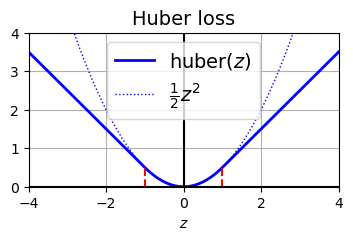

In [6]:
# Visualizing the Huber loss function
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(4, 2))
z = np.linspace(-4, 4, 200)
plt.plot(z, huber_fn(0, z), "b-", linewidth=2, label="huber($z$)")
plt.plot(z, z**2 / 2, "b:", linewidth=1, label=r"$\frac{1}{2}z^2$")
plt.plot([-1, -1], [0, huber_fn(0., -1.)], "r--")
plt.plot([1, 1], [0, huber_fn(0., 1.)], "r--")
plt.gca().axhline(y=0, color='k')
plt.gca().axvline(x=0, color='k')
plt.axis([-4, 4, 0, 4])
plt.grid(True)
plt.xlabel("$z$")
plt.legend(fontsize=14)
plt.title("Huber loss", fontsize=14)
plt.show()

In [1]:
# Training Neural Network with Huber Loss using TensorFlow/Keras

import tensorflow as tf
from tensorflow import keras
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the California housing dataset
housing = fetch_california_housing()

# Split the data into train, validation, and test sets
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target.reshape(-1, 1), random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

# Standardize the input features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

# Define the Huber loss function for regression
def huber_fn(y_true, y_pred):
    error = y_true - y_pred
    is_small_error = tf.abs(error) < 1
    squared_loss = tf.square(error) / 2
    linear_loss = tf.abs(error) - 0.5
    return tf.where(is_small_error, squared_loss, linear_loss)

# Determine the input shape for the neural network
input_shape = X_train.shape[1:]

# Build a sequential neural network model using Keras
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal",
                       input_shape=input_shape),
    keras.layers.Dense(1),
])

# Compile the model with Huber loss function and Nadam optimizer
model.compile(loss=huber_fn, optimizer="nadam", metrics=["mae"])

# Train the model on the scaled training data with validation data
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 1s 1ms/step - loss: 0.6947 - mae: 1.0558 - val_loss: 0.2328 - val_mae: 0.5292
Epoch 2/2
363/363 [==============================] - 0s 1ms/step - loss: 0.2087 - mae: 0.5027 - val_loss: 0.2013 - val_mae: 0.4841


## Saving/Loading Models with Custom Objects

In [7]:
# Save the Model with the Custom Loss Function
model.save("my_model_with_a_custom_loss.h5")

# Load the Model with the Custom Loss Function

# Create a dictionary where you map the names of your functions or objects to
# the actual functions or objects themselves. This dictionary will be used to 
# load and access these custom components later on. 
custom_objects={"huber_fn": huber_fn}

model = keras.models.load_model("my_model_with_a_custom_loss.h5",
                                custom_objects)